In [1]:
#나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,439 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

Text(0.5, 1.0, '안녕')

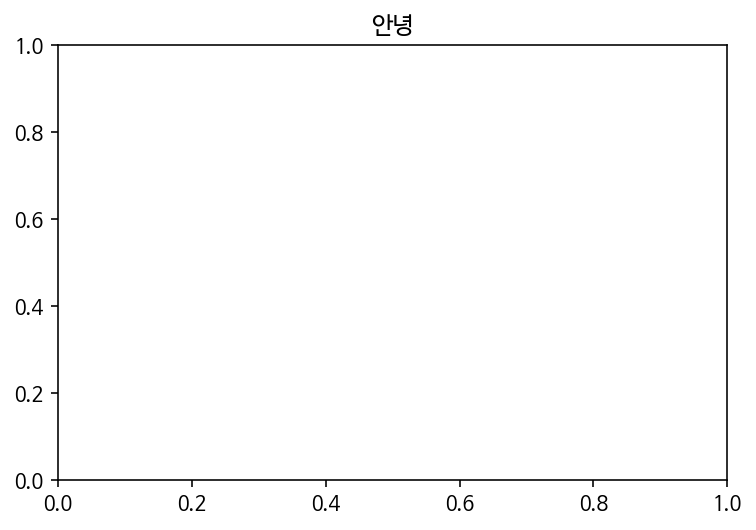

In [1]:
# 상단 런타임 --> 런타임 다시시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [2]:
!pip install nltk
!pip install kss
!pip install wordcloud
!pip install konlpy

     |████████████████████████████████| 42.4 MB 56 kB/s 
     |████████████████████████████████| 168 kB 45.9 MB/s 
  Created wheel for kss: filename=kss-3.2.0-py3-none-any.whl size=42447995 sha256=7c9eced175e75fe6e0b9defb73f3f260a0664dd3f1c14c068c9a7952651f2d3c
  Stored in directory: /root/.cache/pip/wheels/a1/47/9c/a5f83b5ab6096e3c4a33643fc553b26098c23e72b6539b86f4
  Created wheel for emoji: filename=emoji-1.6.0-py3-none-any.whl size=168256 sha256=bb7b6346852eecdc6a3abc71a34d10964430d878f4a0919274281bab134e1d62
  Stored in directory: /root/.cache/pip/wheels/f7/d7/74/c720aaf345a042b0c2d74361873258c5e8649b7f11b2ccce49
Successfully built kss emoji
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 42.9 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulso

In [3]:
# 폰트설치 
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155065 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
#전처리
import konlpy
konlpy.__version__
import nltk
nltk.download('punkt')
from konlpy.tag import Okt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Sentimental Analysis/covid_total.csv', 
                 encoding = 'utf-8', index_col = 0)
df.head()

,날짜,제목,내용,작성자
0,2021.02.15.,[스위스 코로나] 2월말 이후... 대규모 테스트로 정책 변경,2월 24일로 미루어진 스위스 봉쇄완화정책 스위스에서는 지난 해 12월 18일부터 ...,스위스에서의 일상 블로그
1,2021.02.19.,금융당국과 정책금융기관은 상호 협력 하에 코로나發 위기...,한국판 뉴딜·혁신금융 등을 통한 미래혁신 대비 □ 정책금융기관장들은 코로나19 지원...,금융위원회 공식 블로그
2,2021.02.16.,코로나 방역정책 잘하는중? 사회적 거리두기 단계 별 방역수칙,하지만 사회적 거리두기 라는 코로나 방역정책은 잘하고 있는 것이 맞을까? 코로나 단...,푸블의 대전맛집
3,2021.02.19.,[수인재두뇌과학]코로나19 대응 교육부 정책 한눈에 보기!,"이번 포스팅에서는, 지난 1월 발표한 2021년 교육부의 코로나 19 대응과제 & ...",수인재두뇌과학
4,2021.02.15.,코로나19와 ‘교육 없는 교육’ 정책 -조영달(서울대 교수)-,코로나에 뒷북만 치는 교육 정책. ‘교육 마비’ 해결 학교에 떠넘겨 위험에 방비하는...,edu9508(국어공부) 도우미


In [7]:
twitter = Twitter()
word_list = []
word_list =df['제목']

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
#소상공인 만들기
# title_list = df['제목'].tolist()
for i in title_list:
    if '소상 공인' in i:
        i= i.replace('소상 공인','소상공인')
        print(i)

코로나19로 인한 자영업자 소상공인 손실보상법 소급 적용... 
코로나 소상공인 대출 지원 확인하자


In [13]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('이낙연', 'Noun'), ('"', 'Punctuation'), ('자영', 'Noun'), ('업자', 'Noun'), ('피해', 'Noun'), ('눈덩이', 'Noun'), (',', 'Punctuation'), ('사회', 'Noun'), ('적', 'Suffix'), ('거리', 'Noun'), ('두기', 'Noun'), ('단계', 'Noun'), ('적', 'Suffix'), ('완화', 'Noun'), ('...', 'Punctuation')]


In [14]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in['Noun']:
      noun_list.append(word)

In [ ]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

In [ ]:
#카운트
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

In [17]:
tags = tags[2:]
tags[0]

('지원', 4981)

In [18]:
tags[6]

('이후', 3182)

In [19]:
#원본손실없게 new_tags로 복사 후 저장하고, '이후' << 삭제
new_tags = tags.copy()
del new_tags[6]

In [20]:
print(new_tags[20])
print(new_tags[19])

('소상', 1923)
('공인', 1971)


In [21]:
#물리적으로 소상공인 합쳐서 나눈거에요
new_tags.append(('소상공인', 3894))

In [22]:
#소상, 공인 삭제
del new_tags[20]
del new_tags[19]

In [200]:
#list
word_list = []
count_list=[]
for i in new_tags:
    word_list.append(i[0])
    count_list.append(i[1])

network_df = pd.DataFrame({'word_list': word_list, 'frequency' : count_list})
network_df = network_df.sort_values(by=['frequency'], ascending= False) 
network_df = network_df.reset_index()
network_df = network_df.drop(['index'], axis = 1)
network_df.head(2)

,word_list,frequency
0,지원,4981
1,백신,3998


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

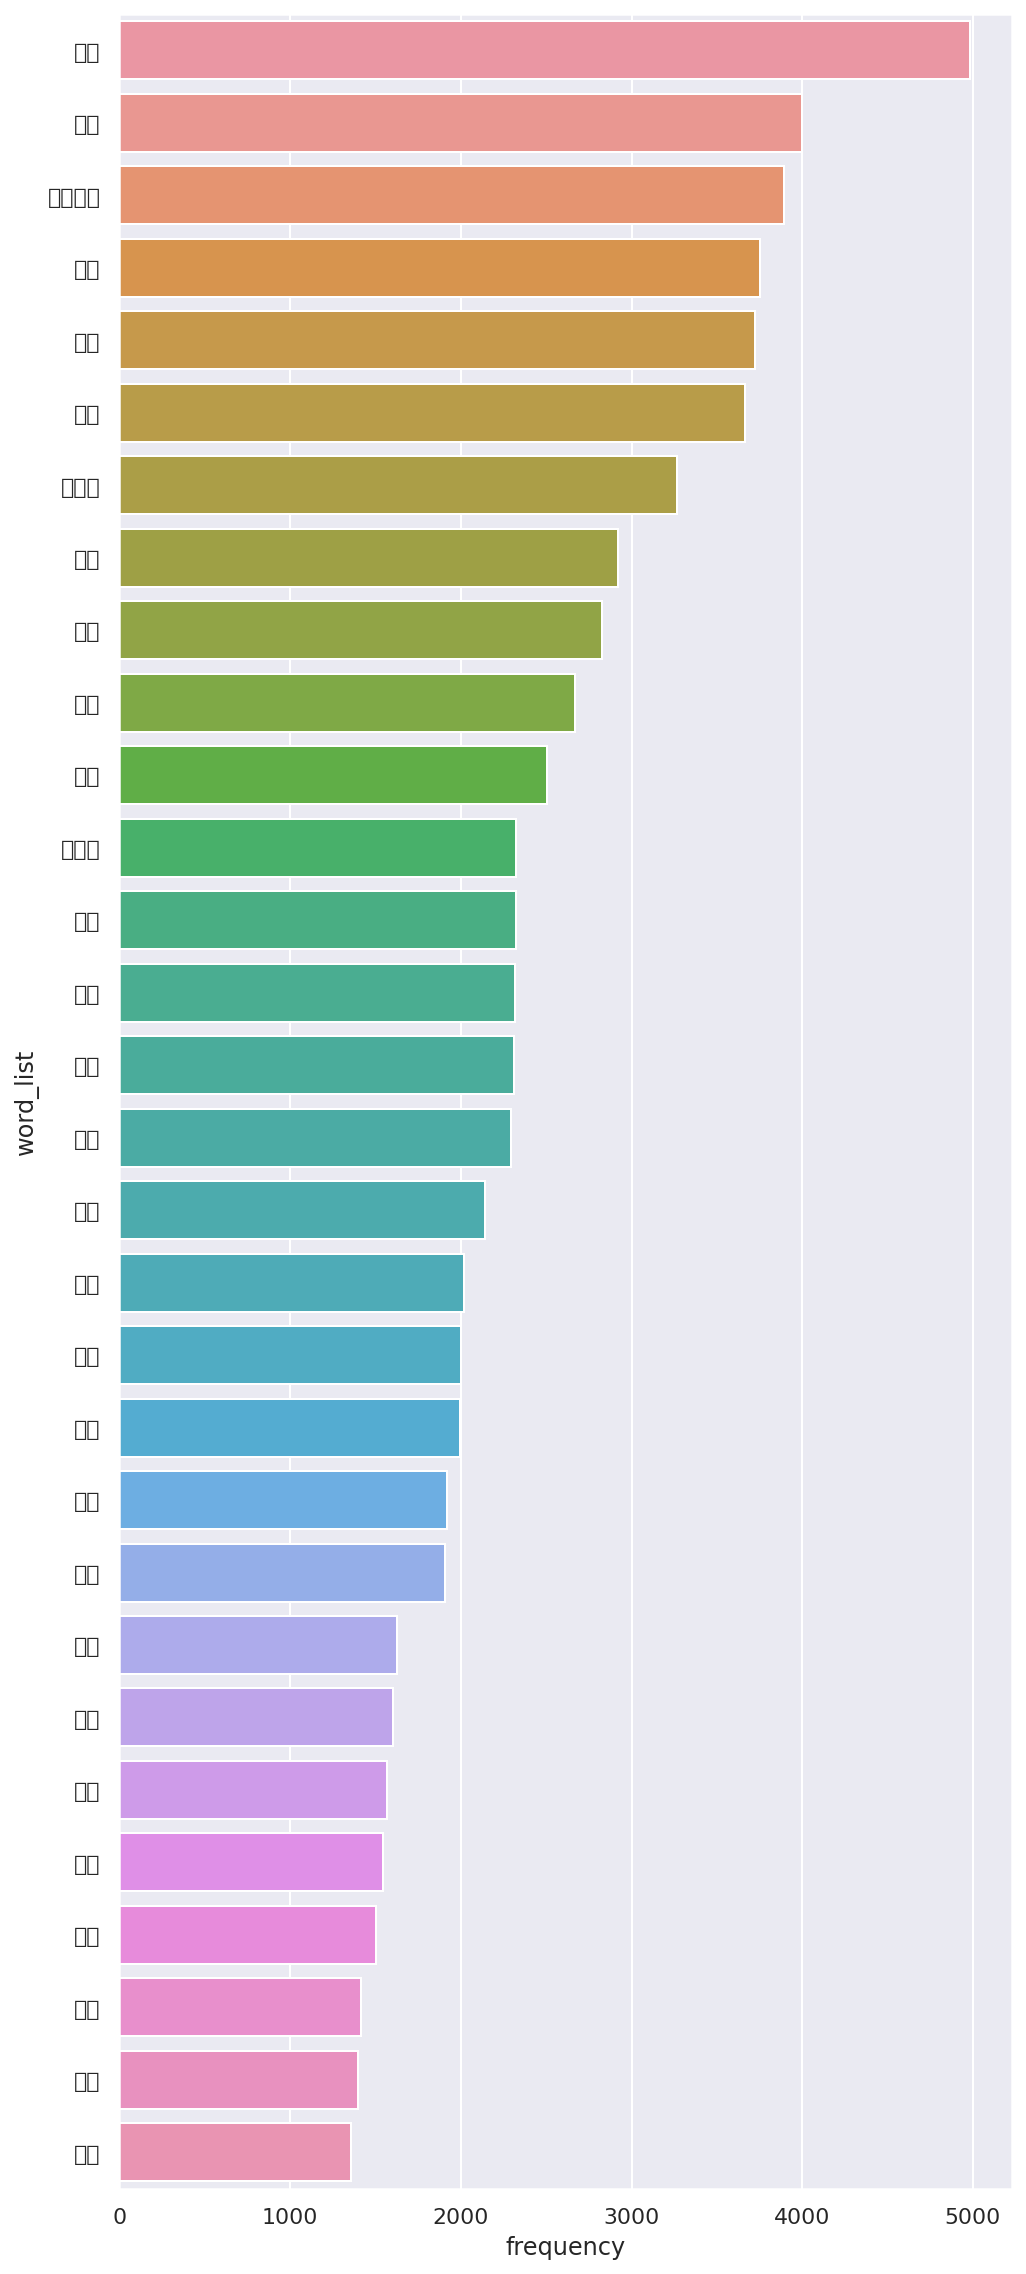

In [201]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8,20))
ax = sns.barplot(x = 'frequency', y = 'word_list', 
                 data = network_df.sort_values(by = 'frequency', 
                                               ascending = False).head(30))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
plt.show()

{'지원': 4981, '백신': 3998, '경제': 3750, '시대': 3722, '정부': 3664, '포스트': 3268, '대응': 2921, '자금': 2826, '관련': 2669, '청년': 2507, '부동산': 2326, '극복': 2321, '한국': 2320, '뉴스': 2311, '미국': 2294, '원금': 2142, '확산': 2016, '방역': 2001, '교육': 1997, '위기': 1917, '세계': 1906, '사회': 1624, '중국': 1601, '국민': 1565, '접종': 1547, '진자': 1504, '개최': 1417, '현황': 1396, '시장': 1357, '기업': 1348, '대책': 1336, '피해': 1329, '바이러스': 1312, '대출': 1251, '사업': 1245, '재난': 1229, '뉴딜': 1229, '신청': 1227, '전망': 1202, '긴급': 1195, '변화': 1192, '미래': 1184, '안내': 1182, '산업': 1174, '신종': 1169, '지역': 1155, '투자': 1111, '코로나바이러스': 1096, '상황': 1063, '고용': 1030, '사태': 1028, '중소기업': 1020, '복지': 1017, '방법': 959, '온라인': 950, '일본': 938, '방향': 928, '일자리': 926, '단계': 921, '정보': 920, '발표': 916, '경기': 914, '서울': 903, '대한': 883, '정리': 874, '금융': 861, '영향': 859, '브리핑': 856, '포럼': 853, '생활': 850, '바이든': 845, '토론회': 839, '거리': 829, '전략': 818, '의원': 816, '경기도': 808, '국가': 807, '소식': 807, '동향': 803, '마스크': 800, '문화': 782, '회복': 780, '추진': 779, '회의': 769, '감염'

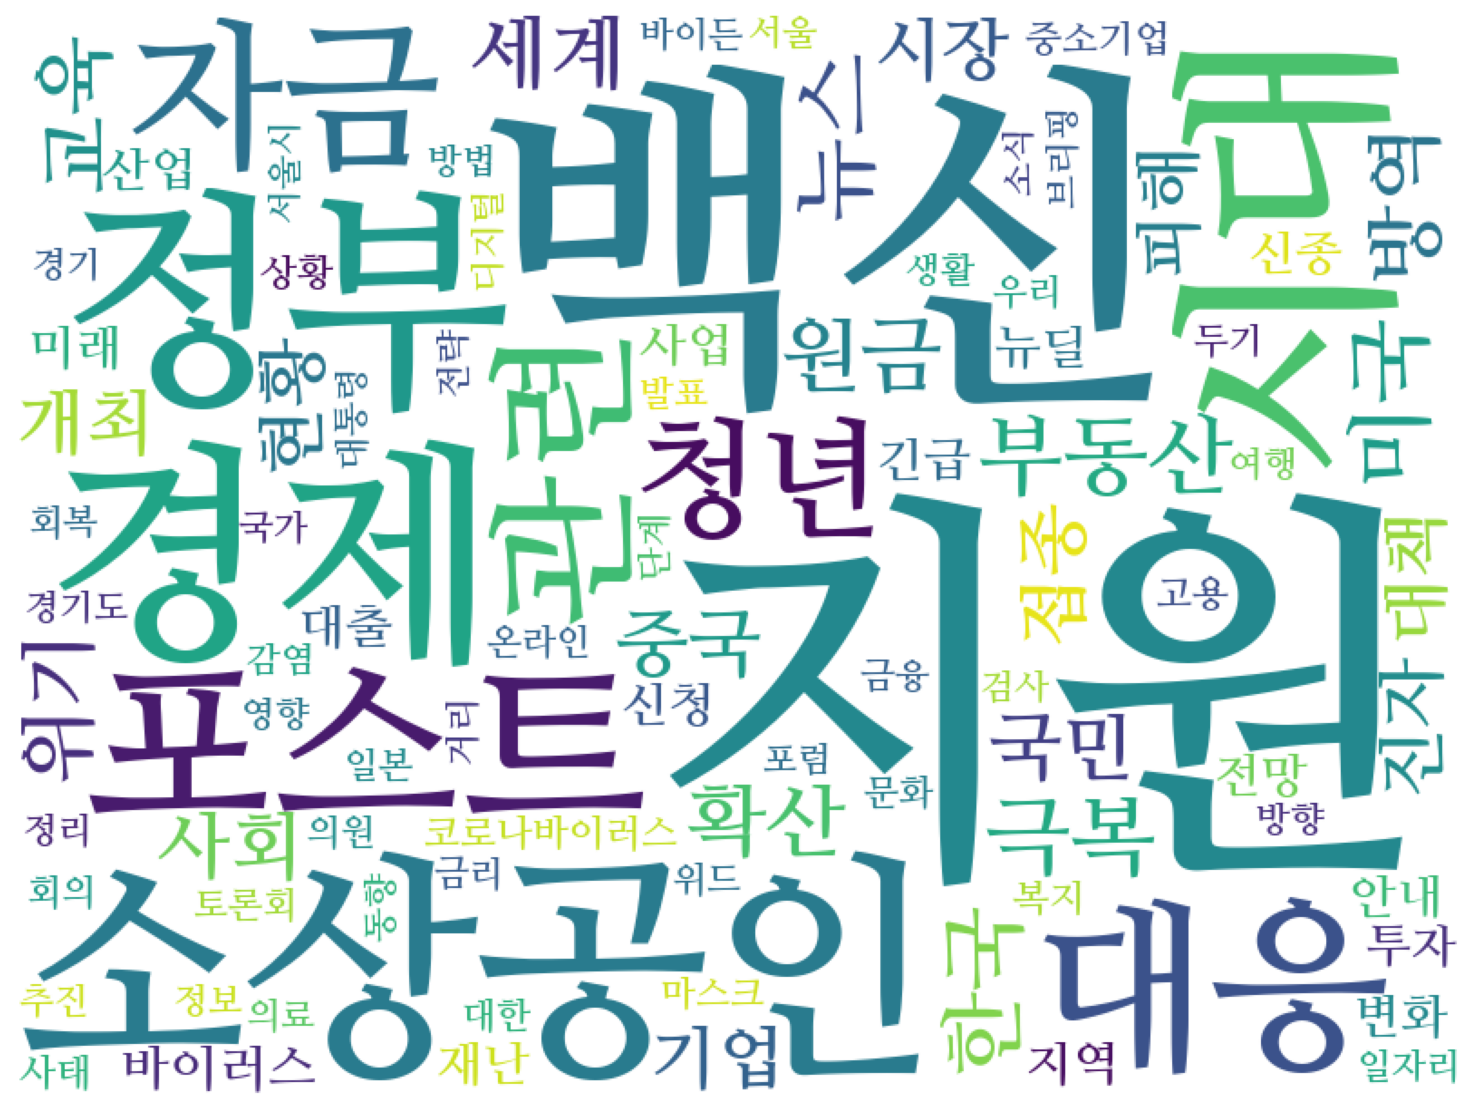

In [202]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud

STOPWORDS = {'코로나', '정책'}

#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = STOPWORDS,
                      background_color='white',
                      width=800,
                      height=600)

print(dict(new_tags))

cloud = wordcloud.generate_from_frequencies(dict(new_tags))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
#https://blog.daum.net/geoscience/1408

In [59]:
from konlpy.tag import Twitter
nlpy = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [60]:
import re

In [61]:
lines = df['제목'].tolist()

In [63]:
a = lines[100]
print(a)

[서평활동] 코로나 이후 학교의 미래


In [65]:
nouns = nlpy.nouns(a)
print(nouns)

['서평', '활동', '코로나', '이후', '학교', '미래']


In [ ]:
dataset

In [ ]:
dataset = []
for num, i in enumerate (lines[:10]) :
    i = nlpy.nouns(i)
    dataset.append(i)

In [139]:
dataset[:10]

[['스위스', '코로나', '이후', '대규모', '테스트', '정책', '변경'],
 ['금융', '당국', '정책금융', '기관', '상호', '협력', '하', '코로나', '위기'],
 ['코로나', '방역', '정책', '중', '사회', '거리', '두기', '단계', '별', '방역', '칙'],
 ['인재', '두뇌', '과학', '코로나', '대응', '교육부', '정책', '한눈', '보기'],
 ['코로나', '교육', '교육', '정책', '달', '서울대', '교수'],
 ['섬서성', '서안', '코로나', '최신', '격리', '정책'],
 ['약속', '남발', '점', '정부', '코로나', '백신', '정책'],
 ['공항', '코로나', '검사', '및', '호텔', '격리', '의무', '정책'],
 ['일본', '이민', '정책', '코로나', '문제', '종식', '후의', '일본', '기본', '방향'],
 ['올해', '사업', '공개', '포스트', '코로나', '문화', '예술', '정책', '변화']]

In [141]:
lines[1]

'금융당국과 정책금융기관은 상호 협력 하에 코로나發 위기... '

In [152]:
data_lines = dataset.copy()

In [142]:
test = data_lines[1].copy()
print(test)

['금융', '당국', '정책금융', '기관', '상호', '협력', '하', '코로나', '위기']


In [144]:
for i in test:
    if len(i)>1:
        pass
    elif len(i)==1:
        test.remove(i)


In [145]:
test

['금융', '당국', '정책금융', '기관', '상호', '협력', '코로나', '위기']

In [153]:
#1글자 이상
for num, i in enumerate (data_lines):
    for j in i:
        if len(j) ==1:
            data_lines[num].remove(j)

data_lines[:20]

[['스위스', '코로나', '이후', '대규모', '테스트', '정책', '변경'],
 ['금융', '당국', '정책금융', '기관', '상호', '협력', '코로나', '위기'],
 ['코로나', '방역', '정책', '사회', '거리', '두기', '단계', '방역'],
 ['인재', '두뇌', '과학', '코로나', '대응', '교육부', '정책', '한눈', '보기'],
 ['코로나', '교육', '교육', '정책', '서울대', '교수'],
 ['섬서성', '서안', '코로나', '최신', '격리', '정책'],
 ['약속', '남발', '정부', '코로나', '백신', '정책'],
 ['공항', '코로나', '검사', '호텔', '격리', '의무', '정책'],
 ['일본', '이민', '정책', '코로나', '문제', '종식', '후의', '일본', '기본', '방향'],
 ['올해', '사업', '공개', '포스트', '코로나', '문화', '예술', '정책', '변화'],
 ['범어역', '범어', '도서관', '운영', '시간', '정보', '코로나', '운영', '정책'],
 ['경기도', '정책', '자금', '대출', '코로나', '복합'],
 ['민족', '코로나', '가족', '만남', '수혈', '지혈', '정책'],
 ['올해', '정책', '코로나', '대응', '올인', '제도', '뒷받침', '필요'],
 ['코로나', '대출', '만기', '연장', '성수', '정책금융', '기관', '목소리'],
 ['성수', '정책금융', '기관', '코로나', '대출', '만기', '연장', '공감'],
 ['코로나', '무한', '재정정책', '결말'],
 ['신종', '코로나바이러스', '감염증', '정부', '거리', '두기', '정책'],
 ['추천', '전세계', '코로나', '셧다운', '정책', '항의', '시민'],
 ['정부', '원금', '코로나', '관련', '정책', '상대', '설움', '분노']]

In [183]:
#소상공인
for num, i in enumerate (data_lines):
    try:
        if '소상' in i:
            data_lines[num].remove('소상')
            data_lines[num].remove('공인')
            data_lines[num].append('소상공인')
    except ValueError as e:
        print(i)

['코로나', '피해', '공인경', '영안', '정지', '원금', '신청']
['코로나', '공업', '금융', '위기']
['자영', '업자', '인공', '정책', '자금', '컨설팅']


### **apriori**

In [156]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=e2d2fc9e7f75194a3b2f5a1116d7d39a88dff82961f18c5965773c834d076767
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [193]:
#min_support 로 지지도 변경 가능 (대부분 0.02~0.05)

from apyori import apriori
result = (list(apriori(data_lines, min_support = 0.02)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
21,(코로나),0.591890,"[((), (코로나), 0.5918895407195913, 1.0)]",1
18,(정책),0.291930,"[((), (정책), 0.2919296915081082, 1.0)]",1
34,"(정책, 코로나)",0.057326,"[((), (정책, 코로나), 0.05732640360464857, 1.0), ((...",2
19,(지원),0.052921,"[((), (지원), 0.05292096986460262, 1.0)]",1
8,(백신),0.041567,"[((), (백신), 0.041567219111775335, 1.0)]",1


In [194]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
34,"(정책, 코로나)",0.057326,"[((), (정책, 코로나), 0.05732640360464857, 1.0), ((...",2
29,"(시대, 코로나)",0.037418,"[((), (시대, 코로나), 0.03741830429836497, 1.0), ((...",2
28,"(백신, 코로나)",0.037117,"[((), (백신, 코로나), 0.03711717338448841, 1.0), ((...",2
36,"(포스트, 코로나)",0.036013,"[((), (포스트, 코로나), 0.03601302670027436, 1.0), (...",2
30,"(이후, 코로나)",0.033426,"[((), (이후, 코로나), 0.03342553144029801, 1.0), ((...",2


In [195]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [196]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

In [172]:
#레이아웃


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


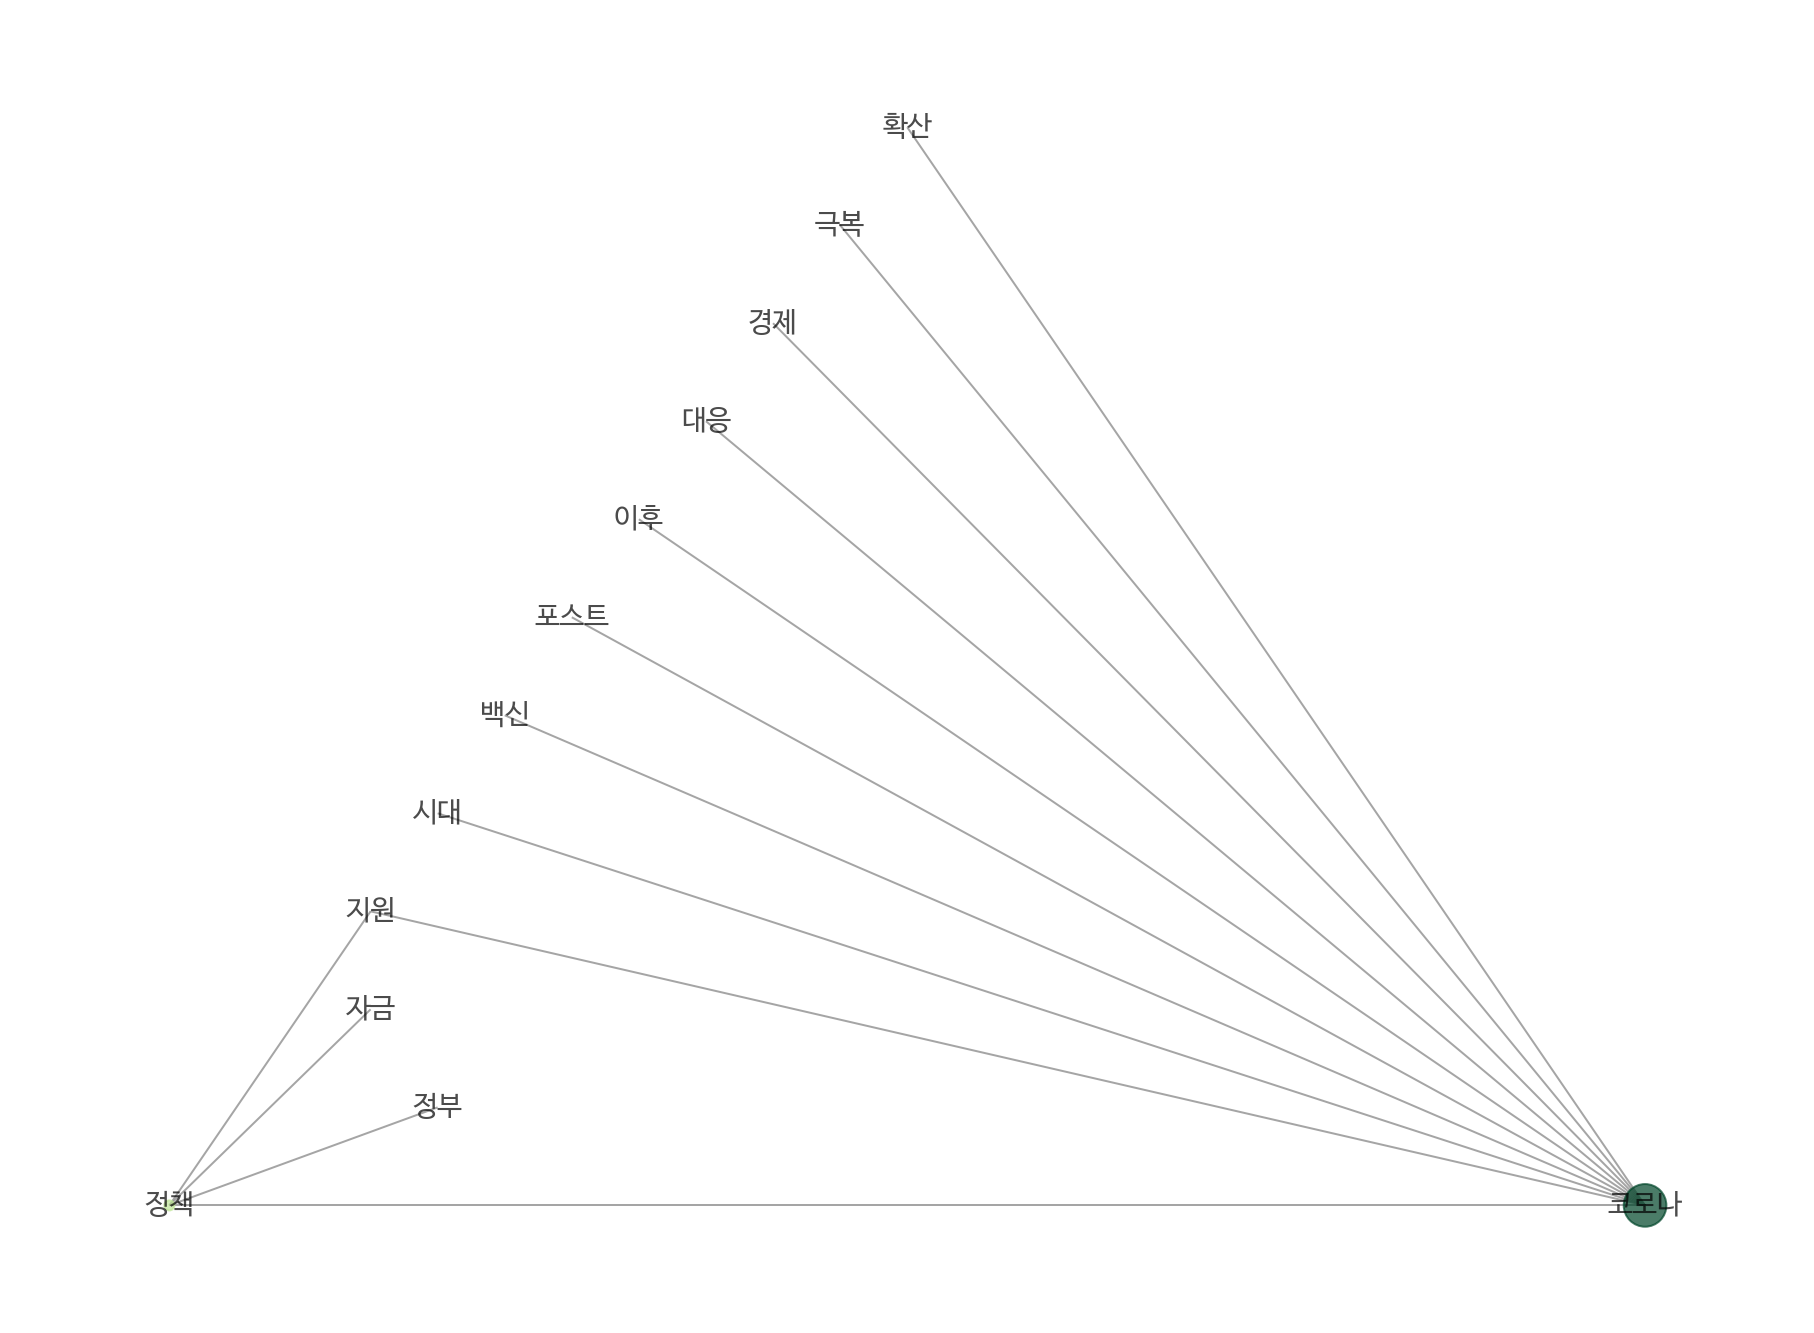

In [197]:
pos = nx.planar_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


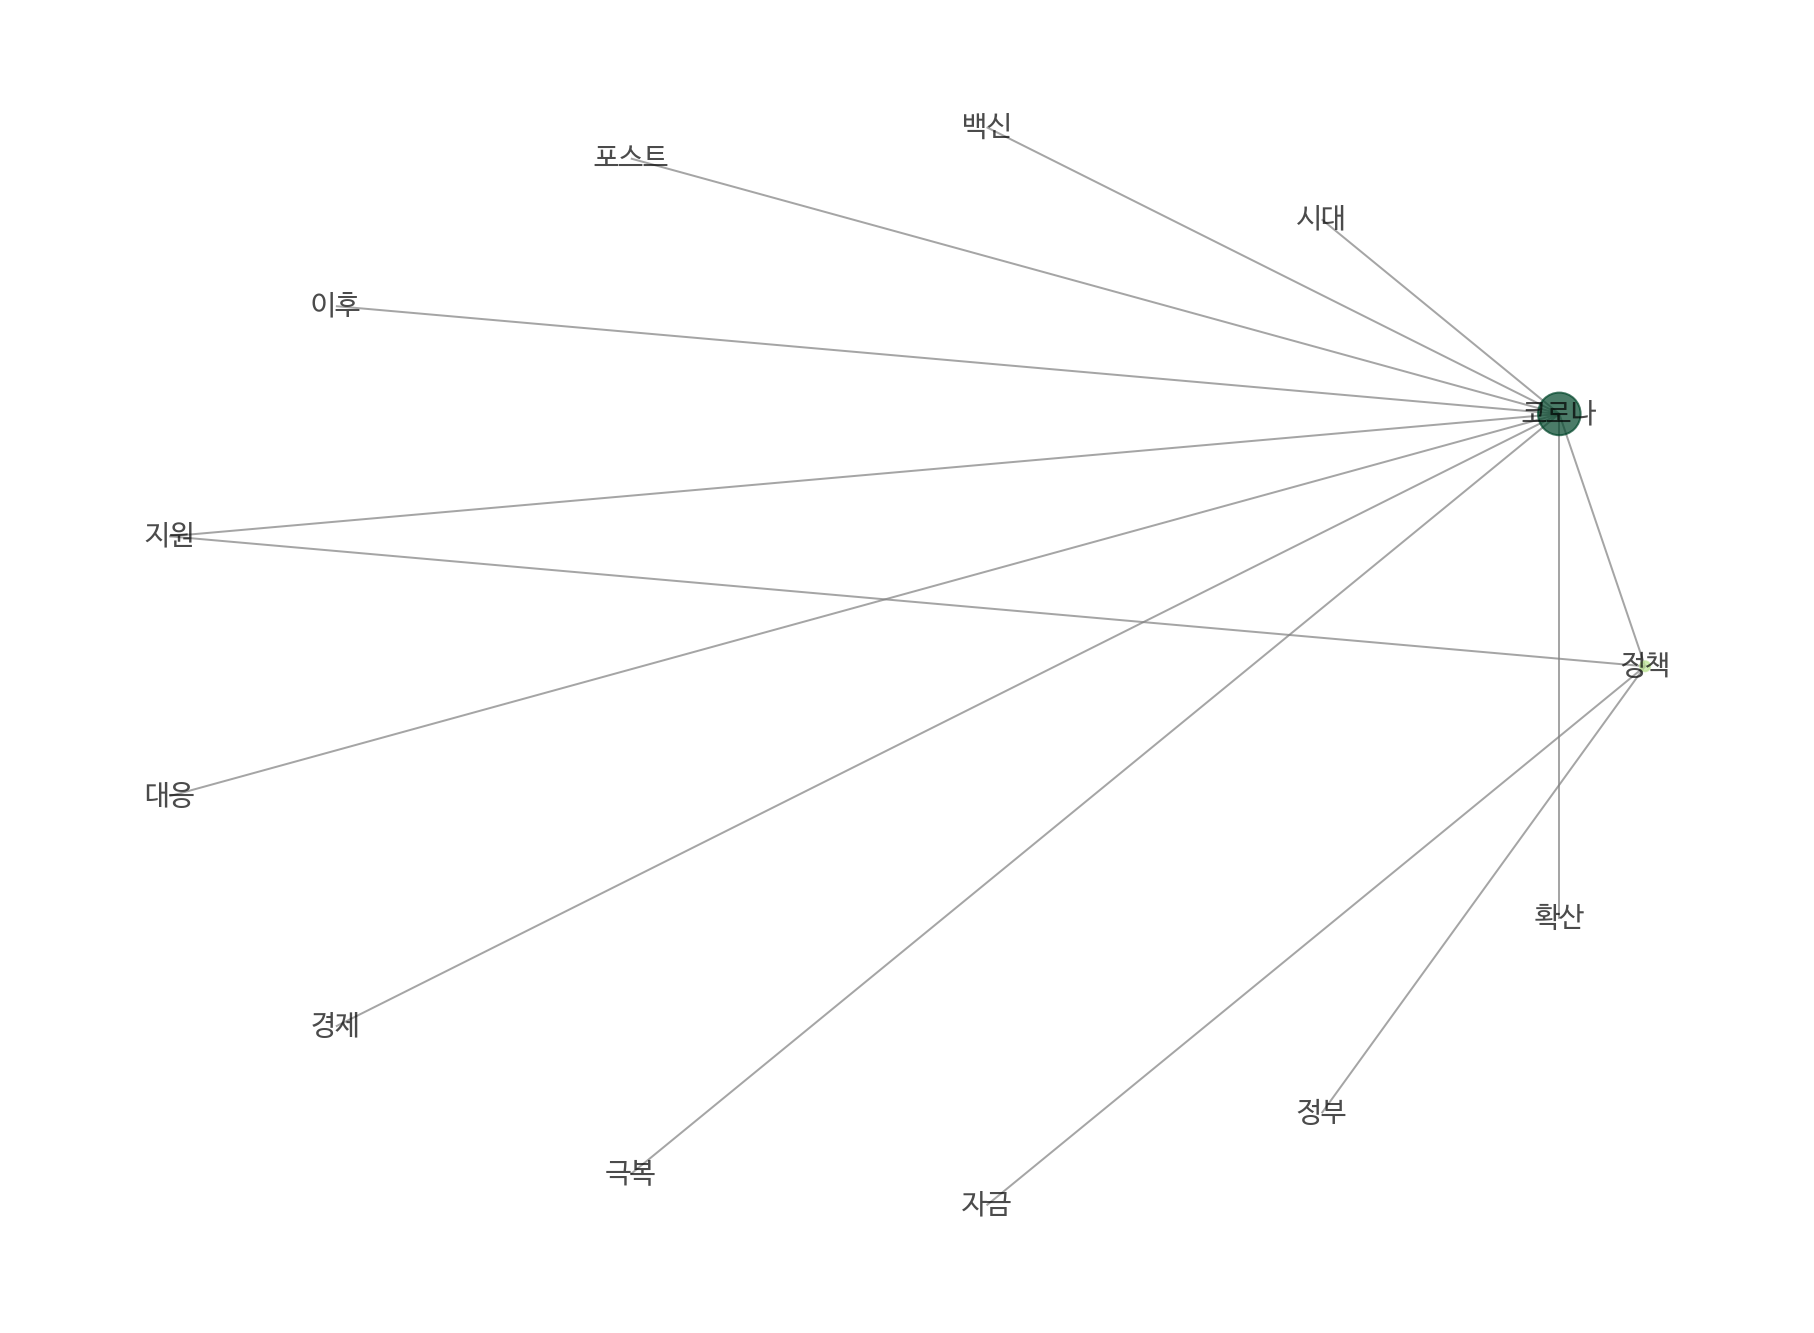

In [198]:
pos = nx.circular_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

## **EDA**

In [191]:
df_network['items'].unique()

array([frozenset({'정책', '코로나'}), frozenset({'시대', '코로나'}),
       frozenset({'백신', '코로나'}), frozenset({'포스트', '코로나'}),
       frozenset({'이후', '코로나'}), frozenset({'코로나', '지원'}),
       frozenset({'대응', '코로나'}), frozenset({'경제', '코로나'}),
       frozenset({'극복', '코로나'}), frozenset({'정책', '지원'}),
       frozenset({'정책', '자금'}), frozenset({'정책', '정부'}),
       frozenset({'확산', '코로나'}), frozenset({'관련', '코로나'}),
       frozenset({'정부', '코로나'}), frozenset({'방역', '코로나'}),
       frozenset({'코로나', '위기'}), frozenset({'세계', '코로나'}),
       frozenset({'코로나', '원금'}), frozenset({'시대', '포스트'}),
       frozenset({'진자', '코로나'}), frozenset({'한국', '코로나'}),
       frozenset({'부동산', '정책'}), frozenset({'청년', '정책'}),
       frozenset({'접종', '코로나'}), frozenset({'바이러스', '코로나'}),
       frozenset({'소상공인', '코로나'}), frozenset({'미국', '코로나'}),
       frozenset({'접종', '백신'}), frozenset({'피해', '코로나'}),
       frozenset({'현황', '코로나'}), frozenset({'대책', '코로나'}),
       frozenset({'사회', '코로나'}), frozenset({'뉴스', '코로나'}